In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X    = iris.data
y    = iris.target
#print(X,y)
features     = iris.feature_names
target_names = iris.target_names
print('Features--',features)
print('Target  --',target_names)

Features-- ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target  -- ['setosa' 'versicolor' 'virginica']


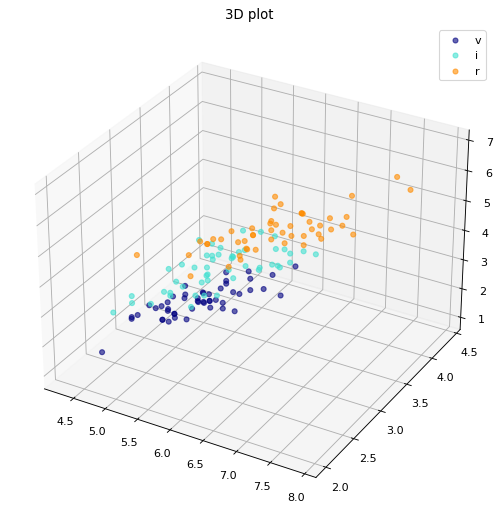

In [19]:
# plotting in 3-D
colors = ['navy','turquoise','darkorange']
fig    = plt.figure(figsize=(8,8),dpi=80)
ax     = fig.add_subplot(111,projection='3d') 

for color,i,target_names in zip(colors,[0,1,2],target_names):   
    ax.scatter(X[y==i,0],X[y==i,1],X[y==i,2],alpha=0.6,color=color,label=target_names)
plt.title('3D plot')
plt.legend()
plt.show()

In [5]:
X.shape

(150, 4)

In [6]:
# train test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=30)

In [8]:
X_train.shape

(105, 4)

In [9]:
y_test

array([2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1])

In [10]:
#KNN classification for checking the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
acc = knn.score(X_test,y_test)
print('The accuracy of KNN on the original dataset : {}'.format(acc))

The accuracy of KNN on the original dataset : 0.9333333333333333


In [11]:
# Comparing the result of KNN classifier after LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda2 = LinearDiscriminantAnalysis(n_components =2) # down scaling the dimension to 2D from original data
lda2.fit(X_train,y_train)
x_train_mod = lda2.transform(X_train)
x_test_mod  = lda2.transform(X_test)

In [12]:
knn.fit(x_train_mod,y_train)
acc = knn.score(x_test_mod,y_test)
print('The accuracy of KNN after LDA on the original dataset : {}'.format(acc))

The accuracy of KNN after LDA on the original dataset : 0.9555555555555556


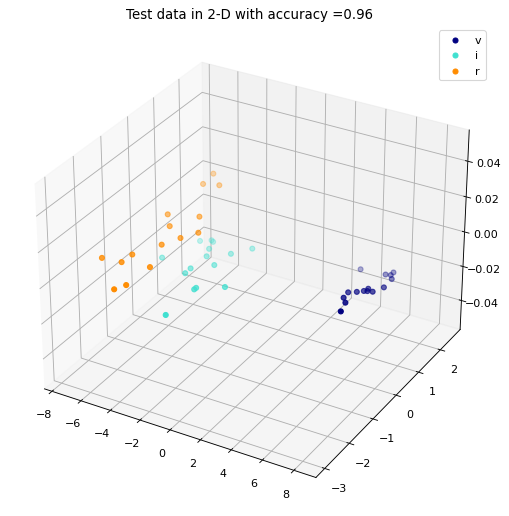

In [18]:
from mpl_toolkits import mplot3d
colors = ['navy','turquoise','darkorange']
fig    = plt.figure(figsize=(8,8),dpi=80)
ax     = fig.add_subplot(111,projection='3d')
for color,i,target_name in zip(colors,[0,1,2],target_names):
    plt.scatter(x_test_mod[y_test==i,0],x_test_mod[y_test==i,1],s=20,color=color,label=target_name)
plt.legend()
plt.title('Test data in 2-D with accuracy ={:.2f}'.format(acc))
plt.show()

In [14]:
# now converting 4D data to 1D
lda1 = LinearDiscriminantAnalysis(n_components =1) # down scaling the dimension to 2D from original data
lda1.fit(X_train,y_train)
x_train_mod1 = lda1.transform(X_train)
x_test_mod1  = lda1.transform(X_test)

knn.fit(x_train_mod1,y_train)
acc1 = knn.score(x_test_mod1,y_test)
print('The accuracy of KNN after LDA on the original dataset : {}'.format(acc1))

The accuracy of KNN after LDA on the original dataset : 0.9777777777777777


In [15]:
x_test_mod1[0]

array([-5.96238128])

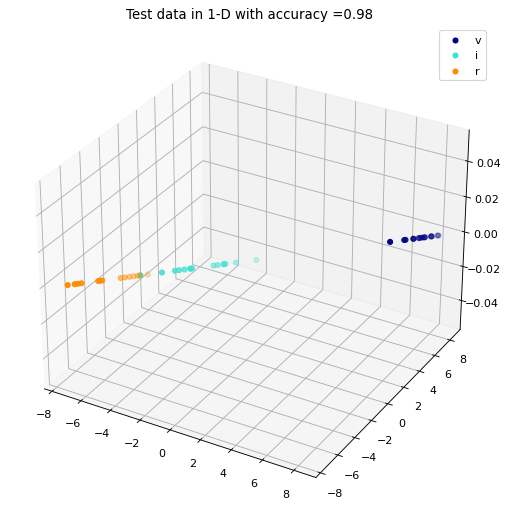

In [16]:
from mpl_toolkits import mplot3d
colors = ['navy','turquoise','darkorange']
fig    = plt.figure(figsize=(8,8),dpi=80)
ax     = fig.add_subplot(111,projection='3d')
for color,i,target_name in zip(colors,[0,1,2],target_names):
    plt.scatter(x_test_mod1[y_test==i],x_test_mod1[y_test==i],s=20,color=color,label=target_name)
plt.legend()
plt.title('Test data in 1-D with accuracy ={:.2f}'.format(acc1))
plt.show()